In [3]:
# Import stuff
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [59]:
class Spiral:
    
    def __init__(self, k=1):
        self._r = np.linspace(0.0, 1.0, 100 * k)
        self._t = 2 * np.pi * k * self._r
        
    def __copy__(self):
        new_spiral = Spiral()
        new_spiral._r = self._r
        new_spiral._t = self._t
        return new_spiral
        
    ### Internal Methods ###
    
    def _set_cartesian(self, x, y):
        self._r = np.sqrt(x**2 + y**2)
        self._t = np.arctan2(y, x)
        
    ### Transformations ###
    
    def linear_transform(self, A):
        x, y = self.get_cartesian()
        pos = np.row_stack((x, y))
        pos = np.dot(A, pos)
        self._set_cartesian(pos[0, :], pos[1, :])
    
    def offset(self, c):
        if (c.shape != (2,)):
            raise ValueError("Offset must be a (2,) array")
        x, y = self.get_cartesian()
        pos = np.column_stack((x, y))
        pos = pos + c
        self._set_cartesian(pos[:, 0], pos[:, 1])
    
    ### Getters ###
    
    def get_polar(self):
        return self._t, self._r
    
    def get_cartesian(self):
        x = self._r * np.cos(self._t)
        y = self._r * np.sin(self._t)
        return x, y

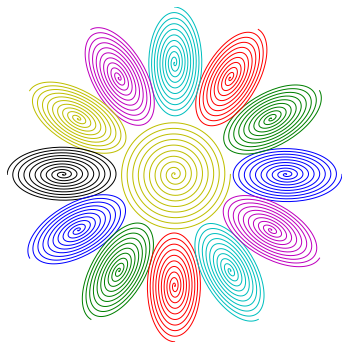

In [69]:
squish = np.array([[1.0, 0.0], [0.0, 0.5]])
unit_angle = np.pi/6
shift = np.array([2.0, 0])

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect('equal')
ax.axis('off')
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.xticks([])
plt.yticks([])

for ii in range(12):
    a = ii * unit_angle
    rotation = np.array([[np.cos(a), -np.sin(a)], [np.sin(a), np.cos(a)]])

    spiral = Spiral(10)
    spiral.linear_transform(squish)
    spiral.offset(shift)
    spiral.linear_transform(rotation)
    x, y = spiral.get_cartesian()
    ax.plot(x, y)

spiral = Spiral(10)
x, y = spiral.get_cartesian()
ax.plot(x, y)

    
plt.show()